In [72]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelBinarizer
from PIL import Image

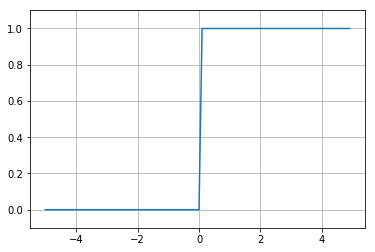

In [5]:
# 定义阶越函数
def step_func(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_func(x)
plt.plot(x,y)
# 指定y轴范围
plt.ylim(-0.1, 1.1)
plt.grid()

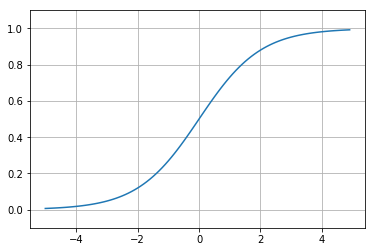

In [4]:
# Sigmoid函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.grid()

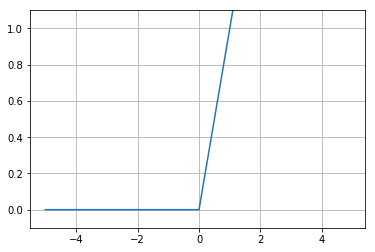

In [7]:
# 激活函数不能使用线性函数：不管有多深，总能找到与之等效的 无隐藏层的神经网络
# ReLU（Rectified Linear Unit）激活函数
def relu(x):
    return np.maximum(0,x)  # 从输入的数值中找到最大的输出
x = np.arange(-5, 5, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.grid()

In [10]:
class EasyNet:
    def __init__(self):
        self.network = {}
        self.network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
        self.network['b1'] = np.array([0.1, 0.2, 0.3])
        self.network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
        self.network['b2'] = np.array([0.1, 0.2])
        self.network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
        self.network['b3'] = np.array([0.1, 0.2])
    def forward(self,x):
        W1, W2, W3 = self.network['W1'], self.network['W2'], self.network['W3']
        b1, b2, b3 = self.network['b1'], self.network['b2'], self.network['b3']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        identity_func = lambda x:x
        y = identity_func(a3)
        return y
network = EasyNet()
x = np.array([1.0,0.5])
y = network.forward(x)
y

array([0.31682708, 0.69627909])

In [29]:
# softmax函数,粗略版本，容易溢出，导致计算错误
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

# 更新版,在原公式上分子分母同乘以一个常数结果值不变
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [45]:
# 导入手写数字图像数据
digits = load_digits()
# 取出第一张图片和第一个标签
img = digits.data[0]
label = digits.target[0]
# 可视化图片
# img.shape
imgre = img.reshape(8,8)
# pil_img = Image.fromarray(np.uint8(img))
# pil_img.show()
print(imgre)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [91]:
# 用神经网络进行推理
class EasyNet:
    def __init__(self):
        self.network = {}
        self.network['W1'] = np.random.rand(192).reshape(64,3)
        self.network['b1'] = np.random.rand(3)
        self.network['W2'] = np.random.rand(30).reshape(3,10)
        self.network['b2'] = np.random.rand(10)
        self.network['W3'] = np.random.rand(100).reshape(10,10)
        self.network['b3'] = np.random.rand(10)
    def forward(self,x):
        W1, W2, W3 = self.network['W1'], self.network['W2'], self.network['W3']
        b1, b2, b3 = self.network['b1'], self.network['b2'], self.network['b3']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        y = softmax(a3)
        return y
network = EasyNet()
print(img.shape)
x = np.array(img)
y = network.forward(x)
# print(f'预测值为：{np.where(y ==np.max(y))[0]}')
print(f'预测值为：{np.argmax(y)}')

(64,)
预测值为：1


In [64]:
# 均方误差
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [65]:
# 交叉熵误差
def cross_entropy_error(y,t):
    delta = 1e-7  # 用于防止log(0)
    return -np.sum(t*np.log(y+delta))

In [75]:
# mini-batch批量数据准备
digits = load_digits()
data = digits.data
target = digits.target
# 将标签转换为onehot编码
target = LabelBinarizer().fit_transform(target)
target

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [77]:
# 抽取其中10组
train_size = len(data)
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = data[batch_mask]
t_batch = target[batch_mask]

In [78]:
# mini-batch 版交叉熵误差,one_hot版
def cross_entropy_error(y, t):
    if y.ndim==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y + 1e-7))/batch_size

# mini-batch 版交叉熵误差,非one_hot版
def cross_entropy_error_no(y, t):
    if y.nidm==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

In [79]:
# Numerical Differentiation 数值微分
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h)-f(x-h))/2*h

In [103]:
# 梯度
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)  # 生成和x形状相同的数值
    for idx in range(x.size):
        temp_val = x[idx]
        # f(x+h)
        x[idx] = temp_val + h
        fxh1 = f(x)
        # f(x-h)
        x[idx] = temp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = temp_val
    return grad

def function_2(x):
    return np.sum(x**2)

# 计算 函数 y = x1**2 + x2**2的梯度
numerical_gradient(function_2, np.array([3.0,4.0]))

2


array([6., 8.])

In [81]:
# 实现梯度下降算法
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    return x

gradient_descent(function_2, init_x=np.array([-3.0,4.0]),lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

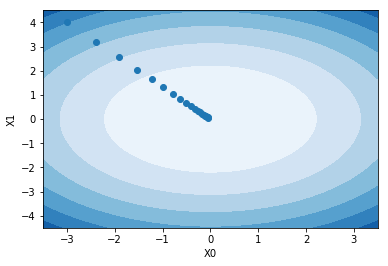

In [90]:
# 可视化此过程
def gradient_descentest(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)

# 计算x,y坐标等高线对应的高度值
def f(x, y):
    return x**2 + y**2

init_x = np.array([-3.0, 4.0])    
lr = 0.1
step_num = 20
x, x_history = gradient_descentest(function_2, init_x, lr=lr, step_num=step_num)
# 可大概看出最优解为（0,0）
# plt.plot( [-5, 5], [0,0], '--b')
# plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')
plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
# 生成x,y的数据, n越多，图像越细腻
n = 256
x = np.linspace(-3.5, 3.5, n)
y = np.linspace(-5, 5, n)
# 把x,y数据生成mesh网格状的数据，因为等高线的显示是在网格的基础上添加上高度值
X, Y = np.meshgrid(x, y)
# 填充等高线
plt.contourf(X, Y, f(X, Y),cmap=plt.cm.Blues)
print('',end='')

In [105]:
# 适用于mini-batch的梯度算法
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        it.iternext()   
    return grad
class SimpleNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std*np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)
    def predict(self,x):
        W1,W2 = self.params['W1'],self.params['W2']
        b1,b2 = self.params['b1'],self.params['b2']
        a1 = np.dot(x,W1)+b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2)
        return y
    def loss(self,x,t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        acc = np.sum(y==t)/float(x.shape[0])
        return acc
    def numerical_gradient(self, x, t):
        loss_W = lambda W:self.loss(x,t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
net = SimpleNet(input_size=64, hidden_size=100, output_size=10)
print(f"W1:{net.params['W1'].shape},b1:{net.params['b1'].shape},W2:{net.params['W2'].shape},b2:{net.params['b2'].shape}")
x = np.random.rand(100,64)
net.predict(x)[:2]

W1:(64, 100),b1:(100,),W2:(100, 10),b2:(10,)


array([[0.00105866, 0.00107921, 0.00104013, 0.00094517, 0.0009932 ,
        0.0010391 , 0.00094007, 0.00100322, 0.00094854, 0.0009542 ],
       [0.00105726, 0.00107902, 0.00104123, 0.00094397, 0.0009927 ,
        0.00103958, 0.00094051, 0.00100364, 0.00094848, 0.00095499]])

In [110]:
# 开始学习
# 超参数
iters_num = 100
train_size = data.shape[0]
batch_size = 100
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []
# 平均每个epoch的重复次数
iter_per_epoch = max(train_size / batch_size, 1)

network = SimpleNet(input_size=64, hidden_size=100, output_size=10)
for i in range(iters_num):
    # 获取mini-batch
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = data[batch_mask]
    t_batch = target[batch_mask]
    # 计算梯度
    grad = network.numerical_gradient(x_batch,t_batch)
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key]
    # 记录学习过程
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_batch, t_batch)
#         test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
#         test_acc_list.append(test_acc)
#         print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

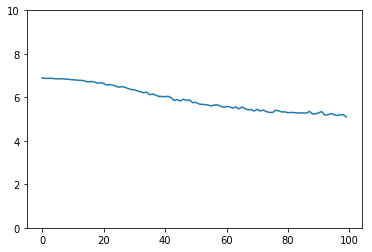

In [112]:
# 显示误差，由于训练次数不多，所以误差较大
plt.plot([x for x in range(100)],train_loss_list)
plt.ylim(0,10)
plt.show()